<a href="https://colab.research.google.com/github/sipra1304/ML_projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

# Create a Sequential model
model = Sequential()

# Input layer with 11 neurons and ReLU activation
model.add(Dense(11, activation='relu', input_dim=11))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout for regularization

# Hidden layers with 11 neurons and ReLU activation
model.add(Dense(11, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 batch_normalization_6 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 11)                0         
                                                                 
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 batch_normalization_7 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 11)               

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 11)                132       
                                                                 
 batch_normalization_6 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 11)                0         
                                                                 
 dense_16 (Dense)            (None, 11)                132       
                                                                 
 batch_normalization_7 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 11)               

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=60,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 3s 8ms/step - loss: 0.7621 - accuracy: 0.5220 - val_loss: 0.6130 - val_accuracy: 0.7969
Epoch 2/100
107/107 [==============================] - 1s 8ms/step - loss: 0.6549 - accuracy: 0.6363 - val_loss: 0.5761 - val_accuracy: 0.7969
Epoch 3/100
107/107 [==============================] - 1s 10ms/step - loss: 0.5939 - accuracy: 0.7209 - val_loss: 0.5448 - val_accuracy: 0.7969
Epoch 4/100
107/107 [==============================] - 1s 10ms/step - loss: 0.5627 - accuracy: 0.7558 - val_loss: 0.5258 - val_accuracy: 0.7969
Epoch 5/100
107/107 [==============================] - 1s 7ms/step - loss: 0.5467 - accuracy: 0.7784 - val_loss: 0.5122 - val_accuracy: 0.7969
Epoch 6/100
107/107 [==============================] - 1s 6ms/step - loss: 0.5397 - accuracy: 0.7839 - val_loss: 0.5083 - val_accuracy: 0.7969
Epoch 7/100
107/107 [==============================] - 1s 7ms/step - loss: 0.5268 - accuracy: 0.7889 - val_loss: 0.5040 - val_accuracy: 0.79

In [ ]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[0.2383973 ],
       [0.23598044],
       [0.2221339 ],
       ...,
       [0.23904377],
       [0.23708604],
       [0.23823482]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

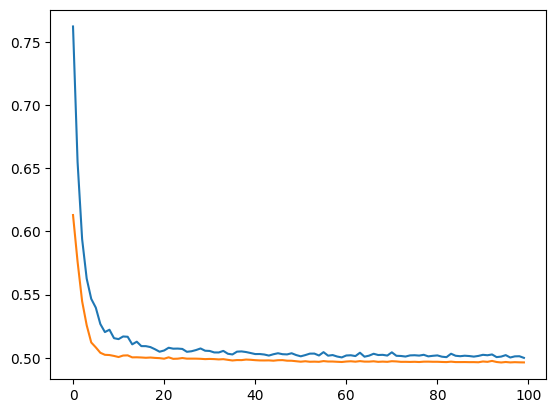

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

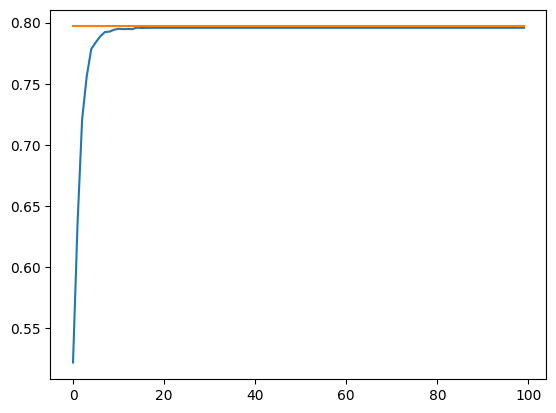

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

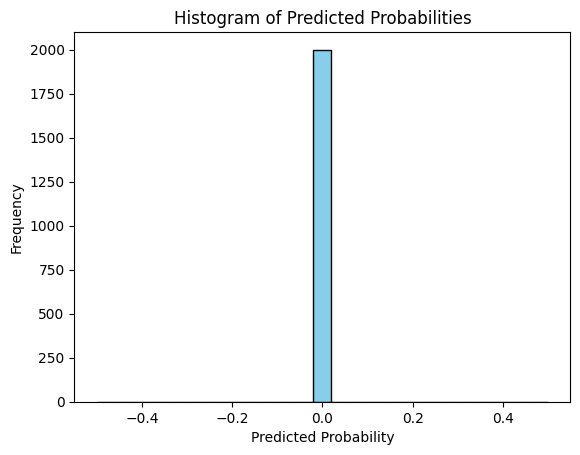

In [ ]:
plt.hist(y_pred, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()


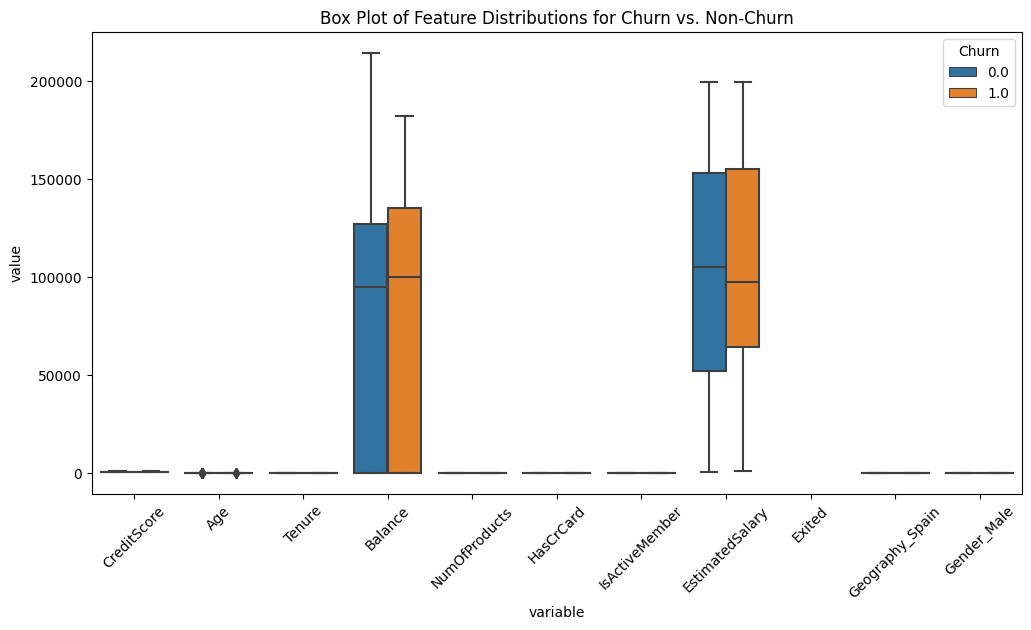

In [ ]:
import pandas as pd
import seaborn as sns
# Assuming X_test is a DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Geography_Spain','Gender_Male'])

# Concatenate X_test_df with y_test for plotting
data_for_boxplot = pd.concat([X_test_df, pd.Series(y_test, name='Churn')], axis=1)

# Melt the DataFrame for boxplot
data_for_boxplot_melted = pd.melt(data_for_boxplot, id_vars='Churn')

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Churn', data=data_for_boxplot_melted)
plt.xticks(rotation=45)
plt.title('Box Plot of Feature Distributions for Churn vs. Non-Churn')
plt.show()


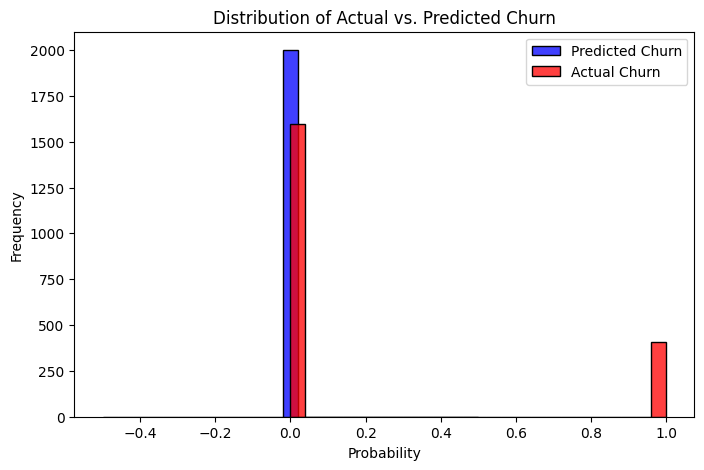

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, bins=25, color='blue', label='Predicted Churn', kde=False)
sns.histplot(y_test, bins=25, color='red', label='Actual Churn', kde=False)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Churn')
plt.legend()
plt.show()


63/63 [==============================] - 0s 3ms/step


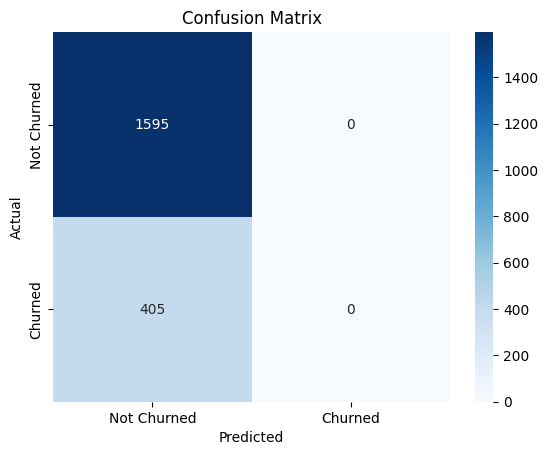

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
